In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

### Data Visualization

In [3]:
df = pd.read_csv('2024_oct_nov_mbta.csv')

In [4]:
df['service_date'] = pd.to_datetime(df['service_date'])
df['stop_departure_datetime'] = pd.to_datetime(df['stop_departure_datetime'])

### 4 Side-By-Side Boxplots for Headways

In [5]:
df['day_type'] = np.where(df['service_date'].dt.weekday < 5, 'weekday', 'weekend') 

In [6]:
#create new dataframe with dates with the average headway duration for that day
df['service_date'] = pd.to_datetime(df['service_date'])
avg_df = df.groupby('service_date')['headway_trunk_seconds'].mean().reset_index()
avg_df.columns = ['service_date', 'avg_headway']

#splitting data into weekdays vs. weekends for both weeks and store average headway
w1_weekdays = pd.to_datetime(['2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-07'])
w1_weekend = pd.to_datetime(['2024-10-05', '2024-10-06'])
w2_weekdays = pd.to_datetime(['2024-11-05', '2024-11-06', '2024-11-07', '2024-11-08', '2024-11-11'])
w2_weekend = pd.to_datetime(['2024-11-09', '2024-11-10'])

def get_avg_data(dates):
  return avg_df[avg_df['service_date'].isin(dates)]['avg_headway']

w1_wd, w1_we = get_avg_data(w1_weekdays), get_avg_data(w1_weekend)
w2_wd, w2_we = get_avg_data(w2_weekdays), get_avg_data(w2_weekend)

In [7]:
#initialize + scale weekday vs. weekend data
wd_data = pd.concat([w1_wd, w2_wd])
wd_y_min = wd_data.min() * 0.95
wd_y_max = wd_data.max() * 1.05 #setting consistent y scale for weekdays

we_data = pd.concat([w1_we, w2_we])
we_y_min = we_data.min() * 0.95
we_y_max = we_data.max() * 1.05 #setting consistent y scale for weekends

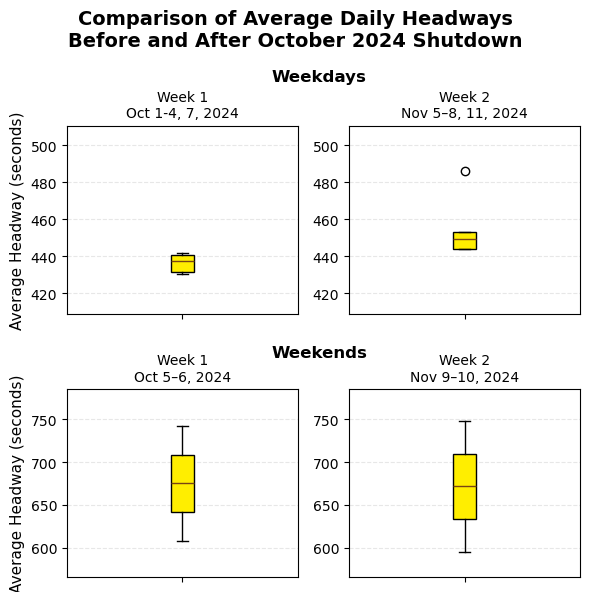

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
axes = axes.flatten()

plots = [('Week 1\nOct 1-4, 7, 2024', w1_wd, wd_y_min, wd_y_max),
         ('Week 2\nNov 5–8, 11, 2024', w2_wd, wd_y_min, wd_y_max),
         ('Week 1\nOct 5–6, 2024', w1_we, we_y_min, we_y_max),
         ('Week 2\nNov 9–10, 2024', w2_we, we_y_min, we_y_max)]

for ax, (title, data, y_min, y_max) in zip(axes, plots):
  ax.boxplot([data], patch_artist=True, widths=0.1, boxprops={'facecolor': "#FFEE00"},  medianprops={'color': "#774414"})
  ax.set_title(title, fontsize=10)
  if ax in [axes[0], axes[2]]:
    ax.set_ylabel('Average Headway (seconds)', fontsize=11)
  ax.set_xticklabels([''])
  ax.grid(axis='y', alpha=0.3, linestyle='--')
  ax.set_ylim(y_min, y_max)

fig.suptitle('Comparison of Average Daily Headways\nBefore and After October 2024 Shutdown\n',
             fontsize=14, fontweight='heavy')
fig.text(0.54, 0.86, 'Weekdays', ha='center', fontsize=12, fontweight = 'semibold')
fig.text(0.54, 0.4, 'Weekends', ha='center', fontsize=12, fontweight = 'semibold')

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()


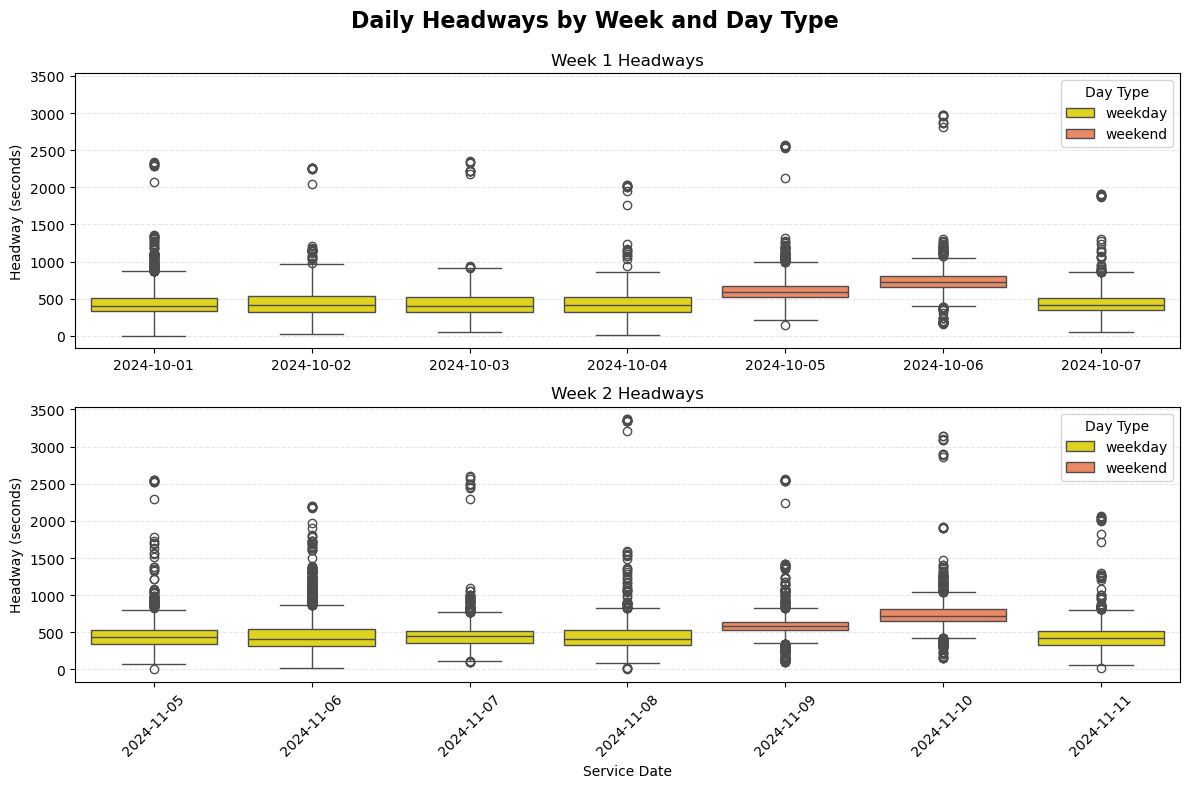

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ensure service_date is datetime
df['service_date'] = pd.to_datetime(df['service_date'])

# Sort by service_date for proper ordering
df = df.sort_values('service_date')

# Prepare figure
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharey=True)

# Week 1 (top)
week1_df = df[df['week'] == 1]
sns.boxplot(x='service_date', y='headway_trunk_seconds', hue='day_type',
            data=week1_df, ax=axes[0],
            palette={'weekday':'#FFEE00', 'weekend':'#FF7F50'})
axes[0].set_title('Week 1 Headways')
axes[0].set_xlabel('')
axes[0].set_ylabel('Headway (seconds)')
axes[0].grid(axis='y', linestyle='--', alpha=0.3)
axes[0].legend(title='Day Type', loc='upper right')

# Week 2 (bottom)
week2_df = df[df['week'] == 2]
sns.boxplot(x='service_date', y='headway_trunk_seconds', hue='day_type',
            data=week2_df, ax=axes[1],
            palette={'weekday':'#FFEE00', 'weekend':'#FF7F50'})
axes[1].set_title('Week 2 Headways')
axes[1].set_xlabel('Service Date')
axes[1].set_ylabel('Headway (seconds)')
axes[1].grid(axis='y', linestyle='--', alpha=0.3)
axes[1].legend(title='Day Type', loc='upper right')

fig.suptitle('Daily Headways by Week and Day Type', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


### Dual Barcharts showing headway improvement by stop

In [41]:
#splitting data into weekdays vs. weekends for both weeks and store average headway, this time groupiing by stop names
def get_avg_data_stops(dates):
  filtered_df = df[df['service_date'].isin(dates)]
  return filtered_df.groupby('stop_name')['headway_trunk_seconds'].mean().round(2)

w1_wd_avg, w1_we_avg = get_avg_data_stops(w1_weekdays), get_avg_data_stops(w1_weekend)
w2_wd_avg, w2_we_avg = get_avg_data_stops(w2_weekdays), get_avg_data_stops(w2_weekend)
w1_wd_avg

stop_name
Assembly                441.06
Back Bay                431.80
Chinatown               431.83
Community College       441.01
Downtown Crossing       440.23
Green Street            431.50
Haymarket               441.65
Jackson Square          432.12
Malden Center           435.33
Massachusetts Avenue    431.97
North Station           441.60
Roxbury Crossing        431.52
Ruggles                 432.04
State                   442.14
Stony Brook             431.47
Sullivan Square         440.97
Tufts Medical Center    431.84
Wellington              441.35
Name: headway_trunk_seconds, dtype: float64

In [44]:
#create new dataframe sorted by weekly improvements
def weekly_improvement_calc(w1, w2):
  comparison_df = pd.DataFrame({'week1': w1, 'week2': w2}).dropna()
  comparison_df['improvement'] = round(comparison_df['week1'] - comparison_df['week2'], 2)
  return comparison_df.sort_values('improvement', ascending=False)

wd_comparison_df = weekly_improvement_calc(w1_wd_avg, w2_wd_avg)
we_comparison_df = weekly_improvement_calc(w1_we_avg, w2_we_avg)

In [45]:
wd_comparison_df.to_csv('wd_comparison_df.csv')
we_comparison_df.to_csv('we_comparison_df.csv')

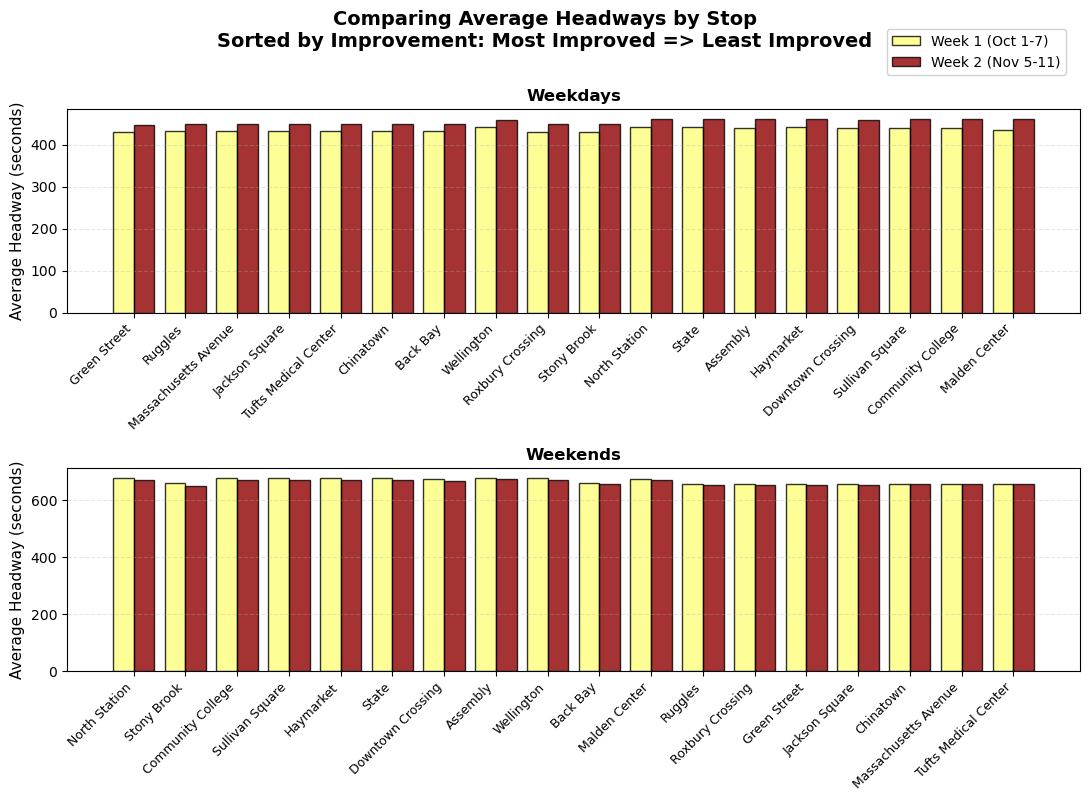

In [38]:
fig, axes = plt.subplots(2, 1, figsize=(11, 8))
width = 0.4
#c = ['#002051', '#f0d752']
c = ["#FDFF7C", "#8f0000"]

plots = [(wd_comparison_df, 'Weekdays', 'Week 1 (Oct 1-4, 7)', 'Week 2 (Nov 5-8, 11)'),
         (we_comparison_df, 'Weekends', 'Week 1 (Oct 5-6)', 'Week 2 (Nov 9-10)')]

for ax, (comp_df, title, w1_label, w2_label) in zip(axes, plots):
    x = np.arange(len(comp_df))
    w1_bar = ax.bar(x-width/2, comp_df['week1'], width, label=w1_label, color=c[0], edgecolor='black', alpha=0.8)
    w2_bar = ax.bar(x+width/2, comp_df['week2'], width, label=w2_label, color=c[1], edgecolor='black', alpha=0.8)

    ax.set_ylabel('Average Headway (seconds)', fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(comp_df.index, rotation=45, ha='right', fontsize=9)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

labels = ['Week 1 (Oct 1-7)', 'Week 2 (Nov 5-11)']
fig.legend([w1_bar, w2_bar], labels, loc='upper right', bbox_to_anchor=(0.98, 0.98), fontsize=10, framealpha=0.9)
fig.suptitle('Comparing Average Headways by Stop\nSorted by Improvement: Most Improved => Least Improved', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.985])
plt.show()

### Line Graph

In [16]:
peak_hours = df[df['hour'].between(6, 21)]

In [17]:
wd_headways = peak_hours.query('day_type == "weekday"').groupby(['week', 'hour']).agg(avg_headways=('headway_trunk_seconds', 'mean'), num_trips=('headway_trunk_seconds', 'size')).reset_index()
we_headways = peak_hours.query('day_type == "weekend"').groupby(['week', 'hour']).agg(avg_headways=('headway_trunk_seconds', 'mean'), num_trips=('headway_trunk_seconds', 'size')).reset_index()
for headway_df in [wd_headways, we_headways]:
  headway_df['avg_headways'] = headway_df['avg_headways'].round(2)

In [94]:
wd_headways['period'] = wd_headways['week'].map({1: 'Week 1 (Pre)', 2: 'Week 2 (Post)'})
we_headways['period'] = we_headways['week'].map({1: 'Week 1 (Pre)', 2: 'Week 2 (Post)'})

input_radio = alt.binding_radio(name='Weeks: ', options=[None, 1, 2], labels=['Both', '1', '2'])
radio = alt.param(name='radio', bind=input_radio, value=None)
scale = alt.Scale(domain=[1, 2], range=["#ffb546", "#814c1b"])

weekday = alt.Chart(wd_headways).mark_line(point=True).encode(
    x = alt.X('hour:O', axis=alt.Axis(labelAngle=0)),
    y = alt.Y('avg_headways:Q', scale=alt.Scale(domain=[0, 900])),
    color = alt.condition((alt.datum.week == radio) | (radio == None), alt.Color('week:N', scale=scale), alt.value('grey')),
    opacity = alt.condition((alt.datum.week == radio) | (radio == None), alt.value(1), alt.value(0.1)),
    tooltip=['week:N', 'hour:O', 'avg_headways:Q', 'num_trips:Q']
).add_params(
    radio
).properties(
    width = 415,
    height = 300,
    title = 'Weekday Orange Line Headways'
)

weekend = alt.Chart(we_headways).mark_line(point=True).encode(
    x = alt.X('hour:O', axis=alt.Axis(labelAngle=0)),
    y = alt.Y('avg_headways:Q', scale=alt.Scale(domain=[0, 900])),
    color = alt.condition((alt.datum.week == radio) | (radio == None), alt.Color('week:N', scale=scale), alt.value('grey')),
    opacity = alt.condition((alt.datum.week == radio) | (radio == None), alt.value(1), alt.value(0.1)),
    tooltip=['week:N', 'hour:O', 'avg_headways:Q', 'num_trips:Q']
).add_params(
    radio
).properties(
    width = 415,
    height = 300,
    title = 'Weekend Orange Line Headways'
)

final_chart = (weekday | weekend).configure(
    font='Segoe UI',             # match Matplotlib
    title={'font': 'Segoe UI', 'fontSize': 18},
    axis={
        'labelFont': 'Segoe UI',
        'titleFont': 'Segoe UI'
    },
    legend={
        'labelFont': 'Segoe UI',
        'titleFont': 'Segoe UI'
    }
)

final_chart.save('headway_line_interactive.html')

In [101]:
week_selection = alt.selection_single(
    fields=['week'],           # the field to filter
    bind='legend',             # bind interaction to legend
    empty='all'                # if nothing selected, show all
)

scale = alt.Scale(domain=[1, 2], range=["#ffb546", "#814c1b"])

# Weekday chart
weekday = alt.Chart(wd_headways).mark_line(point=True).encode(
    x=alt.X('hour:O', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('avg_headways:Q', scale=alt.Scale(domain=[0, 900])),
    color=alt.Color('week:N', scale=scale, title='Week'),
    opacity=alt.condition(week_selection, alt.value(1), alt.value(0.1)),  # highlight selected
    tooltip=['week:N', 'hour:O', 'avg_headways:Q', 'num_trips:Q']
).add_selection(
    week_selection
).properties(
    width=415,
    height=300,
    title='Weekday Orange Line Headways'
)

# Weekend chart
weekend = alt.Chart(we_headways).mark_line(point=True).encode(
    x=alt.X('hour:O', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('avg_headways:Q', scale=alt.Scale(domain=[0, 900])),
    color=alt.Color('week:N', scale=scale, title='Week'),
    opacity=alt.condition(week_selection, alt.value(1), alt.value(0.1)),
    tooltip=['week:N', 'hour:O', 'avg_headways:Q', 'num_trips:Q']
).properties(
    width=415,
    height=300,
    title='Weekend Orange Line Headways'
)

# Combine charts side by side and share color scale
final_chart = (weekday | weekend).resolve_scale(color='shared').configure(
    font='Segoe UI',
    title={'font': 'Segoe UI', 'fontSize': 18},
    axis={'labelFont': 'Segoe UI', 'titleFont': 'Segoe UI'},
    legend={'labelFont': 'Segoe UI', 'titleFont': 'Segoe UI'}
)

final_chart.save('headway_line_interactive_legend.html')

### MAP

In [19]:
STATIONLOCS = {'Oak Grove': [42.436710697872506, -71.07092503350304], 'Malden Center': [42.426715054301724, -71.0742494072706],
               'Wellington': [42.402294710280856, -71.07695931633984], 'Assembly': [42.392806031674816, -71.07712767952755],
               'Sullivan Square': [42.38397982837347, -71.07687820052895], 'Community College': [42.37364176211696, -71.06968424389598],
               'North Station': [42.36637544875684, -71.06191354476536], 'Haymarket': [42.3628527768202, -71.05822862533881],
               'State': [42.35880709749407, -71.05764134103336], 'Downtown Crossing': [42.35545700180955, -71.06032872870097],
               'Chinatown': [42.35229276374171, -71.06252887008564], 'Tufts Medical Center': [42.34963189903043, -71.06382599632579],
               'Back Bay': [42.34732022260072, -71.07577517133004], 'Massachusetts Avenue': [42.341447784246036, -71.08326060618234],
               'Ruggles': [42.3365788551873, -71.08920066161751], 'Roxbury Crossing': [42.33132609480257, -71.09542804854041],
               'Jackson Square': [42.323098213457314, -71.09977299407247], 'Stony Brook': [42.317074031538034, -71.10423530764933],
               'Green Street': [42.31042957679869, -71.10745247372988], 'Forest Hills': [42.30060904670217, -71.11384453589027]}

#create south-north index of stations so we can measure only consecutive stations
STATIONPOS = {station: idx for idx, station in enumerate(reversed(STATIONLOCS.keys()))}

In [20]:
def is_consecutive(station1, station2):
    '''check if two stations are consecutive
       params: station1, station2, (str)
       returns: bool True/False'''
    if station1 not in STATIONPOS or station2 not in STATIONPOS:
        return False  # irregular station names

    pos1 = STATIONPOS[station1]
    pos2 = STATIONPOS[station2]
    return abs(pos1 - pos2) == 1  # return True if stations differ by 1 position


def hav_distance(lat1, long1, lat2, long2):
    '''haversine distance in miles between two coordinate pairs
       params: lat1, long1, lat2, long2, (float)
       returns: distance in miles, (float)'''

    lat1_rad, lat2_rad = np.radians(lat1), np.radians(lat2)  # convert to radians
    delta_lat, delta_long = np.radians(lat2 - lat1), np.radians(long2 - long1)
    a = np.sin(delta_lat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_long / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return 3956 * c  # convert from rads to miles by multiplying by earth's radius


def agg_segments(station1, station2):
    '''combines the north->south and south->north variants of the same
       station pair to calculate the combined speed for each:
       e.g. State->Haymarket (North/Outbound) and Haymarket->State (South/Inbound)
       are both aggregated into State->Haymarket (both NB and SB)'''
    if STATIONPOS[station1] < STATIONPOS[station2]:
        return f'{station1} -> {station2}'
    else:
        return f'{station2} -> {station1}'


def calculate_speed(df, stationlocs):
    '''speed calculations for all consecutive stations on each trip
       params: df (Dataframe),
               stationlocs: dict with shape stationname(str): [lat, long]
       returns: dataframe including lat/long and speeds between stations'''
    speeds = []
    # counter for # of times data is skipped due to non-consecutive stations,
    # unreasonable time between stations, or unreasonable speeds
    exclusions = {}

    df = df.sort_values(['trip_id', 'stop_departure_datetime'])
    print(f"{len(df['trip_id'].unique())} trips")

    for trip_id in df['trip_id'].unique():
        trip_df = df[df['trip_id'] == trip_id].sort_values('stop_departure_datetime')
        # print(trip_df)

        for i in range(len(trip_df) - 1):
            r1, r2 = trip_df.iloc[i], trip_df.iloc[i + 1]  # two rows
            s1, s2 = r1['stop_name'], r2['stop_name']  # two stations

            if s1 in STATIONPOS and s2 in STATIONPOS:
                seg_name = agg_segments(s1, s2)
                # setup measurements of included/exclude datapoints for tooltip info
                if seg_name not in exclusions:
                    exclusions[seg_name] = {
                        'skipped_nc': 0,  # num of data skipped for non-consec station pairs
                        'skipped_t': 0,  # num of data skipped for unreasonable time diff
                        'skipped_speed': 0,  # ''' for unreasonable speed calculations
                        'valid_measurements': 0}  # total of non-excluded datapoints

            if not is_consecutive(s1, s2):  # exclude+count non-consecutive stations
                if seg_name in exclusions:
                    exclusions[seg_name]['skipped_nc'] += 1
                continue

            if s1 in stationlocs and s2 in stationlocs:
                lat1, long1 = stationlocs[s1]  # pull station coords from dict
                lat2, long2 = stationlocs[s2]
                distance = hav_distance(lat1, long1, lat2, long2)  # haversine
                delta_time = (r2['stop_departure_datetime'] - r1[
                    'stop_departure_datetime']).total_seconds() / 3600  # time difference

                # exclude+count data where time between stations is <= 0min or >= 30min
                if delta_time <= 0 or delta_time >= 0.5:
                    exclusions[seg_name]['skipped_t'] += 1
                    continue

                speed = distance / delta_time

                # exclude+count unreasonable speeds (under 1mph or over 100mph)
                if not (1 <= speed <= 100):
                    exclusions[seg_name]['skipped_speed'] += 1
                    continue

                speeds.append({
                    'service_date': r1['service_date'],
                    'trip_id': r1['trip_id'],
                    'station1': s1,
                    'station2': s2,
                    'lat1': lat1,
                    'long1': long1,
                    'lat2': lat2,
                    'long2': long2,
                    'speed_mph': speed,
                    'distance_miles': distance,
                    'time_hrs': delta_time,
                    'time_mins': delta_time * 60,
                    'direction': 'North'})

    speeds_df = pd.DataFrame(speeds)

    if len(speeds_df) > 0:  # add exclusion data to speeds dataframe
        speeds_df['seg_name'] = speeds_df.apply(
            lambda row: agg_segments(row['station1'], row['station2']), axis=1)
        speeds_df['skipped_nc'] = speeds_df['seg_name'].map(
            lambda k: exclusions.get(k, {}).get('skipped_nc', 0))
        speeds_df['skipped_t'] = speeds_df['seg_name'].map(
            lambda k: exclusions.get(k, {}).get('skipped_t', 0))

    total_excluded_nc = sum(v['skipped_nc'] for v in exclusions.values())
    total_excluded_t = sum(v['skipped_t'] for v in exclusions.values())
    total_excluded_speed = sum(v['skipped_speed'] for v in exclusions.values())

    print(f'non-consecutive stations skipped: {total_excluded_nc:,}')
    print(f'invalid time diffs skipped: {total_excluded_t:,}')
    print(f'unrealistic speed calculations skipped: {total_excluded_speed:,}')
    #print(f'{len(speeds):,)} valid data points calculated')

    return speeds_df

def speed_subplots(speeds_df, fig, row, col, stationlocs):
    '''Creates a single plotly map showing average speeds between stations with
    a tooltip and a basemap overlay
    params: speeds_df (Dataframe),
            title (str),
            stationlocs (dict)
    returns: plotly figure'''

    if len(speeds_df) == 0:
        return

    #tooltips arent working so im doing this
    # fig.add_trace(
    #     go.Scattermapbox(
    #         lat=[42.35, 42.36],
    #         lon=[-71.08, -71.07],
    #         mode='lines',
    #         line=dict(width=25, color='magenta'),
    #         hovertemplate='<b>DEBUG TEST</b><br>If you see this, tooltips work!<extra></extra>',
    #         hoverlabel=dict(bgcolor='yellow', font=dict(size=16, color='black')),
    #         showlegend=False
    #     ),
    #     row=row, col=col
    # )

    seg_stats = speeds_df.groupby('seg_name').agg({
        'speed_mph': ['mean', 'min', 'max', 'count'],
        'lat1': 'first', 'long1': 'first', 'lat2': 'first', 'long2': 'first',
        'skipped_nc': 'first', 'skipped_t': 'first'}).reset_index()

    seg_stats.columns = ['seg_name', 'avg', 'min', 'max', 'count',
                         'lat1', 'long1', 'lat2', 'long2', 'nc', 't']

    vmin, vmax = seg_stats['avg'].min(), seg_stats['avg'].max() #stats for tooltip

    for _, r in seg_stats.iterrows():
        norm = (r['avg'] - vmin) / (vmax - vmin)
        color = mcolors.to_hex(plt.cm.cividis(norm))
        total = int(r['count'] + r['nc'] + r['t'])

        fig.add_trace( # draw lines
            go.Scattermapbox(
                lat=[r['lat1'], r['lat2']],
                lon=[r['long1'], r['long2']],
                mode='lines',
                line=dict(width=8, color=color),
                hoverinfo='skip',
                showlegend=False
            ),
            row=row, col=col
        )

        # tooltips cannot be added to shapes (at least not easily/in a way i could understand)
        # so i'm creating an invisible marker centered on each line to display the tooltip
        # first we find the midpoint of each marker
        mid_lat = (r['lat1'] + r['lat2']) / 2
        mid_lon = (r['long1'] + r['long2']) / 2

        # then find the segment length to determine marker size
        lat_diff = abs(r['lat2'] - r['lat1'])
        lon_diff = abs(r['long2'] - r['long1'])
        segment_length = np.sqrt(lat_diff ** 2 + lon_diff ** 2)
        marker_size = max(20, min(40, segment_length * 5000))

        tooltip = (
            f"<b>Segment:</b> {r['seg_name']}<br>"
            f"<b>Average Speed:</b> {r['avg']:.1f} mph<br>"
            f"<b>Speed Range:</b> {r['min']:.1f} - {r['max']:.1f} mph<br>"
            f"<b>Included Data Points:</b> {int(r['count'])}<br>"
            f"<b>Excluded (Non-Consecutive):</b> {int(r['nc'])}<br>"
            f"<b>Excluded (Invalid Time):</b> {int(r['t'])}<br>"
            f"<b>Total Data Points:</b> {total}"
        )

        fig.add_trace(
            go.Scattermapbox(
                lat=[mid_lat],
                lon=[mid_lon],
                mode='markers',
                marker=dict(
                    size=marker_size,
                    color=color, #same color as the line
                    opacity=0.01 #invisible
                ),
                text=tooltip,
                hoverinfo='text',
                hoverlabel=dict(
                    bgcolor='white',
                    font=dict(size=12, color='black', family='Arial'),
                    bordercolor='black'
                ),
                showlegend=False
            ),
            row=row, col=col
        )

    lats = [c[0] for c in stationlocs.values()] # get station locations for plotting
    longs = [c[1] for c in stationlocs.values()]
    names = list(stationlocs.keys())

    fig.add_trace(
        go.Scattermapbox(
            lat=lats, lon=longs,
            mode='markers',
            marker=dict(size=8, color='white', opacity=1),
            text=names,
            hovertemplate='<b>%{text}</b><extra></extra>',
            hoverlabel=dict(
                bgcolor='black',
                font=dict(size=12, color='white', family='Arial'),
                bordercolor='white'
            ),
            showlegend=False
        ),
        row=row, col=col
    )

def improvement_subplots(improvement_df, fig, row, col, stationlocs, vmin, vmax):
    '''Calculates the improvement in average speed for each line segment before and after shutdown (second graph)
    '''

    if len(improvement_df) == 0:
        return

    for _, r in improvement_df.iterrows():
        # normalize to scale -1 < 0 < 1
        norm = (r['improvement'] - vmin) / (vmax - vmin)
        # blue (negative improvement) -> white (no improvement) -> red (positive improvement)
        color = mcolors.to_hex(plt.cm.cividis(norm))

        fig.add_trace( # drawing lines, same as before
            go.Scattermapbox(
                lat=[r['lat1'], r['lat2']],
                lon=[r['long1'], r['long2']],
                mode='lines',
                line=dict(width=10, color=color),
                hoverinfo='skip',
                showlegend=False
            ),
            row=row, col=col
        )

        # calculate midpoint of line and marker size, same as before
        mid_lat = (r['lat1'] + r['lat2']) / 2
        mid_long = (r['long1'] + r['long2']) / 2
        lat_diff = abs(r['lat2'] - r['lat1'])
        long_diff = abs(r['long2'] - r['long1'])
        segment_length = np.sqrt(lat_diff ** 2 + long_diff ** 2)
        marker_size = max(20, min(40, segment_length * 5000))

        direction = 'improved' if r['improvement'] > 0 else 'worsened'
        tooltip = (
            f"<b>Segment:</b> {r['seg_name']}<br>"
            f"<b>Speed Change:</b> {r['improvement']:+.1f} mph ({direction})<br>"
            f"<b>Total Data Points:</b> {int(r['total_datapoints'])}"
        )

        # adding the invis markers that display tooltip info
        fig.add_trace(
            go.Scattermapbox(
                lat=[mid_lat],
                lon=[mid_long],
                mode='markers',
                marker=dict(size=marker_size, color=color, opacity=0.01),
                text=tooltip,
                hoverinfo='text',
                hoverlabel=dict(
                    bgcolor='white',
                    font=dict(size=12, color='black', family='Arial'),
                    bordercolor='black'
                ),
                showlegend=False
            ),
            row=row, col=col
        )

    lats = [c[0] for c in stationlocs.values()]  # get station locations for plotting
    longs = [c[1] for c in stationlocs.values()]
    names = list(stationlocs.keys())

    fig.add_trace(
        go.Scattermapbox(
            lat=lats, lon=longs,
            mode='markers',
            marker=dict(size=8, color='white', opacity=1),
            text=names,
            hovertemplate='<b>%{text}</b><extra></extra>',
            hoverlabel=dict(
                bgcolor='black',
                font=dict(size=12, color='white', family='Arial'),
                bordercolor='white'
            ),
            showlegend=False
        ),
        row=row, col=col
    )


def speed_vis(csv, stationlocs):
    ''' generates an interactive plotly figure with 4 subplots to visualize average train speed
    between consecutive station pairs: comparing pre- and post- shutdown and weekdays/weekends
    params: csv (str) - filepath to csv with train data
            stationlocs (dict) - dictionary with station names as keys and station order as values
    returns: speeds_df (pd.DataFrame) - dataframe with average train speed per segment'''

    df = pd.read_csv(csv)
    df['stop_departure_datetime'] = pd.to_datetime(df['stop_departure_datetime'])
    df['service_date'] = pd.to_datetime(df['service_date'])
    speeds_df = calculate_speed(df, stationlocs)

    if len(speeds_df) == 0:
        print('No speed calculations available')
        return

    w1_weekdays = pd.to_datetime(['2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-07'])
    w2_weekdays = pd.to_datetime(['2024-11-05', '2024-11-06', '2024-11-07', '2024-11-08', '2024-11-11'])
    w1_weekend = pd.to_datetime(['2024-10-05', '2024-10-06'])
    w2_weekend = pd.to_datetime(['2024-11-09', '2024-11-10'])

    data = [
        (speeds_df[speeds_df['service_date'].isin(w1_weekdays)], 1, 1, 'Oct 1-4, 7'),
        (speeds_df[speeds_df['service_date'].isin(w2_weekdays)], 1, 2, 'Nov 5-8, 11'),
        (speeds_df[speeds_df['service_date'].isin(w1_weekend)], 2, 1, 'Oct 5-6'),
        (speeds_df[speeds_df['service_date'].isin(w2_weekend)], 2, 2, 'Nov 9-10')]

    comb_fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Oct 1-4, 7, 2024', 'Nov 5-8, 11, 2024', 'Oct 5-6, 2024', 'Nov 9-10, 2024'),
        specs=[[{'type': 'mapbox'}, {'type': 'mapbox'}],
                [{'type': 'mapbox'}, {'type': 'mapbox'}]],
        horizontal_spacing= 0.02, vertical_spacing= 0.1)

    for df_subset, row, col, title in data:
        speed_subplots(df_subset, comb_fig, row, col, stationlocs)

    all_lats = [coords[0] for coords in stationlocs.values()]
    all_longs = [coords[1] for coords in stationlocs.values()]
    center = dict(lat=np.mean(all_lats), lon=np.mean(all_longs))

    for i in range(1,5): # update once for each subplot
        comb_fig.update_layout(**{
            f'mapbox{i}': dict(style='carto-positron', center=center, zoom=10.5) })

    # making a colorbar
    all_speeds = speeds_df.groupby('seg_name')['speed_mph'].mean()
    global_min, global_max = all_speeds.min(), all_speeds.max()
    # 100 colors on the bar
    colorscale = [[i/99, mcolors.to_hex(plt.cm.cividis(i/99))] for i in range(100)]

    comb_fig.add_trace( # adding colorbar to right side of plots
        go.Scattermapbox(
            lat=[center['lat']], lon=[center['lon']], mode='markers',
            marker=dict(size=0.1, color=[global_min], colorscale=colorscale,
                       cmin=global_min, cmax=global_max,
                       colorbar=dict(
                           title=dict(text='Average Speed (mph)', side='right', font=dict(size=12)),
                           thickness=20, len=0.45, x=1.02, y=0.5,
                           tickmode='linear', tick0=global_min, dtick=((global_max-global_min)/5),
                           tickformat='.1f', bordercolor='black', borderwidth=1),
                       showscale=True, opacity=0),
            hoverinfo='skip', showlegend=False),
        row=1, col=2
    )

    comb_fig.update_layout( # update the larger plot and add title
        title='Average Speed Between Stations, Before and After Shutdown (Interactive)</br></br>'
               '<sub><i>Hover over a line segment for statistics</i></sub>',
        title_x = 0.5, title_font_size = 18, height = 1200, margin=dict(t=180),
        showlegend = False, hovermode='closest', hoverdistance=50)

    for a in comb_fig.layout.annotations: #changing titles of subplot
        a.font.size=14
        a.font.color='black'

    comb_fig.write_html('speed_output.html')
    return speeds_df

def improvement_vis(csv, stationlocs):
    ''' generates an interactive plotly figure with 2 subplots to visualize average train speed
        IMPROVEMENT for station pairs: comparing pre- and post- shutdown and weekdays/weekends
        params: csv (str) - filepath to csv with train data
                stationlocs (dict) - dictionary with station names as keys and station order as values
        returns: speeds_df (pd.DataFrame) - dataframe with average train speed improvement per segment'''

    df = pd.read_csv(csv)
    df['stop_departure_datetime'] = pd.to_datetime(df['stop_departure_datetime'])
    df['service_date'] = pd.to_datetime(df['service_date'])
    speeds_df = calculate_speed(df, stationlocs)

    if len(speeds_df) == 0:
        print('No improvement calculations available')
        return

    oct_wd = pd.to_datetime(['2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-07'])
    nov_wd = pd.to_datetime(['2024-11-05', '2024-11-06', '2024-11-07', '2024-11-08', '2024-11-11'])
    oct_we = pd.to_datetime(['2024-10-05', '2024-10-06'])
    nov_we = pd.to_datetime(['2024-11-09', '2024-11-10'])

    # find the average speeds and add to dfs
    oct_wd_speeds = speeds_df[speeds_df['service_date'].isin(oct_wd)].groupby('seg_name').agg({
        'speed_mph': 'mean','lat1': 'first', 'long1': 'first', 'lat2': 'first', 'long2': 'first'}).reset_index()
    oct_wd_speeds.columns = ['seg_name', 'oct_speed', 'lat1', 'long1', 'lat2', 'long2']
    oct_wd_count = speeds_df[speeds_df['service_date'].isin(oct_wd)].groupby('seg_name').size().reset_index(name='oct_count')

    nov_wd_speeds = speeds_df[speeds_df['service_date'].isin(nov_wd)].groupby('seg_name').agg({
        'speed_mph': 'mean'
    }).reset_index()
    nov_wd_speeds.columns = ['seg_name', 'nov_speed']
    nov_wd_count = speeds_df[speeds_df['service_date'].isin(nov_wd)].groupby('seg_name').size().reset_index(name='nov_count')

    oct_we_speeds = speeds_df[speeds_df['service_date'].isin(oct_we)].groupby('seg_name').agg({
        'speed_mph': 'mean',
        'lat1': 'first', 'long1': 'first', 'lat2': 'first', 'long2': 'first'
    }).reset_index()
    oct_we_speeds.columns = ['seg_name', 'oct_speed', 'lat1', 'long1', 'lat2', 'long2']
    oct_we_count = speeds_df[speeds_df['service_date'].isin(oct_we)].groupby('seg_name').size().reset_index(name='oct_count')

    nov_we_speeds = speeds_df[speeds_df['service_date'].isin(nov_we)].groupby('seg_name').agg({
        'speed_mph': 'mean'
    }).reset_index()
    nov_we_speeds.columns = ['seg_name', 'nov_speed']
    nov_we_count = speeds_df[speeds_df['service_date'].isin(nov_we)].groupby('seg_name').size().reset_index(name='nov_count')

    # merge speeds and counts, then calculate difference between months and add counts together
    # fill missing values and drop NAs
    wd_improvement = oct_wd_speeds.merge(nov_wd_speeds, on='seg_name', how='outer')
    wd_improvement = wd_improvement.merge(oct_wd_count, on='seg_name', how='outer')
    wd_improvement = wd_improvement.merge(nov_wd_count, on='seg_name', how='outer')
    wd_improvement['oct_count'] = wd_improvement['oct_count'].fillna(0)
    wd_improvement['nov_count'] = wd_improvement['nov_count'].fillna(0)
    wd_improvement = wd_improvement.dropna(subset=['oct_speed', 'nov_speed'])  # Only keep segments in both periods
    wd_improvement['improvement'] = wd_improvement['nov_speed'] - wd_improvement['oct_speed']
    wd_improvement['total_datapoints'] = wd_improvement['oct_count'] + wd_improvement['nov_count']

    we_improvement = oct_we_speeds.merge(nov_we_speeds, on='seg_name', how='outer')
    we_improvement = we_improvement.merge(oct_we_count, on='seg_name', how='outer')
    we_improvement = we_improvement.merge(nov_we_count, on='seg_name', how='outer')
    we_improvement['oct_count'] = we_improvement['oct_count'].fillna(0)
    we_improvement['nov_count'] = we_improvement['nov_count'].fillna(0)
    we_improvement = we_improvement.dropna(subset=['oct_speed', 'nov_speed'])
    we_improvement['improvement'] = we_improvement['nov_speed'] - we_improvement['oct_speed']
    we_improvement['total_datapoints'] = we_improvement['oct_count'] + we_improvement['nov_count']

    # global stats for colorscale
    all_imps = pd.concat([wd_improvement['improvement'], we_improvement['improvement']])
    global_min, global_max = all_imps.min(), all_imps.max()

    # make the minimum the negative of the maximum so colorbar centers on 0
    barmax = max(abs(global_min), abs(global_max))
    global_min, global_max = -barmax, barmax

    comb_fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Weekday Improvement', 'Weekend Improvement'),
        specs=[[{'type': 'mapbox'}, {'type': 'mapbox'}]],
        horizontal_spacing=0.02, vertical_spacing=0.1)

    # add to subplots
    improvement_subplots(wd_improvement, comb_fig, 1, 1, stationlocs, global_min, global_max)
    improvement_subplots(we_improvement, comb_fig, 1, 2, stationlocs, global_min, global_max)

    all_lats = [coords[0] for coords in stationlocs.values()]
    all_longs = [coords[1] for coords in stationlocs.values()]
    center = dict(lat=np.mean(all_lats), lon=np.mean(all_longs))

    for i in range(1, 3):  # update once for each subplot (only twice this time)
        comb_fig.update_layout(**{
            f'mapbox{i}': dict(style='carto-positron', center=center, zoom=10.5)})

    # making a new diverging colorbar
    n = 100
    # 100 colors on the bar
    colorscale = []
    for i in range(n):
        norm = i / (n-1)
        rgba = plt.cm.cividis(norm)
        color_hex = mcolors.to_hex(rgba)
        colorscale.append([norm, color_hex])

    vals = np.linspace(global_min, global_max, 5)

    comb_fig.add_trace( # i have to do this differently so the tick markers round
        go.Scattermapbox(
            lat=[center['lat']], lon=[center['lon']], mode='markers',
            marker=dict(
                size=0.1,
                color=[0],
                colorscale=colorscale,
                cmin=global_min,
                cmax=global_max,
                colorbar=dict(
                    title = dict(
                        text = 'Change in Average Speed (mph)',
                        side = 'right',
                        font=dict(size=14)
                    ),
                    tickvals=list(vals),
                    ticktext=[f"{v:.1f}" for v in vals],  # <–– one decimal place
                    thickness=20,
                    len=0.6,
                    x=1.02,
                    y=0.5,
                    bordercolor='black',
                    borderwidth=1
                ),
                showscale=True,
                opacity=0
            ),
            hoverinfo='skip',
            showlegend=False
        ),
        row=1, col=2
    )

    comb_fig.update_layout(  # update the larger plot and add title
        title='Improvements in Average Speed Between Stations, Before and After Shutdown (Interactive)</br></br>'
              '<sub><i>Hover over a line segment for statistics</i></sub>',
        title_x=0.5, title_font_size=18, height=1200, margin=dict(t=180),
        showlegend=False, hovermode='closest', hoverdistance=50)

    for a in comb_fig.layout.annotations:  # changing titles of subplot
        a.font.size = 14
        a.font.color = 'black'

    comb_fig.write_html('improvement_output.html')
    return wd_improvement, we_improvement

if __name__ == '__main__':
    csv = '2024_oct_nov_mbta.csv'
    speeds_df = speed_vis(csv, STATIONLOCS)
    wd_imp, we_imp = improvement_vis(csv, STATIONLOCS)
    #fig.show()




728 trips
non-consecutive stations skipped: 1,421
invalid time diffs skipped: 5
unrealistic speed calculations skipped: 9
728 trips
non-consecutive stations skipped: 1,421
invalid time diffs skipped: 5
unrealistic speed calculations skipped: 9
